# Project Title - Netflix TV shows and movies Data Analysis

TODO - Write some introduction about your project here: describe the dataset, where you got it from, what you're trying to do with it, and which tools & techniques you're using. You can also mention about the course [Data Analysis with Python: Zero to Pandas](zerotopandas.com), and what you've learned from it.

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

**TODO** - add some explanation here

> Instructions for downloading the dataset (delete this cell)
>
> - Find an interesting dataset on this page: https://www.kaggle.com/datasets?fileType=csv
> - The data should be in CSV format, and should contain at least 3 columns and 150 rows
> - Download the dataset using the [`opendatasets` Python library](https://github.com/JovianML/opendatasets#opendatasets)

In [1]:
!pip install jovian opendatasets --upgrade --quiet

In [2]:
import jovian
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib

Let's begin by downloading the data, and listing the files within the dataset.

In [3]:
# Change this
dataset_url = 'https://www.kaggle.com/shivamb/netflix-shows?select=netflix_titles.csv' 

In [4]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ayushi1314
Your Kaggle Key: ········


100%|██████████| 1.18M/1.18M [00:00<00:00, 106MB/s]

The dataset has been downloaded and extracted.

In [5]:
# Change this
data_dir = './netflix-shows'

In [6]:
import os
os.listdir(data_dir)

['netflix_titles.csv']

Let us save and upload our work to Jovian before continuing.

In [7]:
project_name = "Netflix Movies and TV Shows Data Analysis" # change this (use lowercase letters and hyphens only)

In [8]:
!pip install jovian --upgrade -q

In [9]:
import jovian

In [10]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ayushisharma1314/netflix-movies-and-tv-shows-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/ayushisharma1314/netflix-movies-and-tv-shows-data-analysis


'https://jovian.ai/ayushisharma1314/netflix-movies-and-tv-shows-data-analysis'

## Data Preparation and Cleaning

**TODO** - Write some explanation here.



> Instructions (delete this cell):
>
> - Load the dataset into a data frame using Pandas
> - Explore the number of rows & columns, ranges of values etc.
> - Handle missing, incorrect and invalid data
> - Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)

In [11]:
netflix_titles_df=pd.read_csv(data_dir + "/netflix_titles.csv")

In [12]:
netflix_titles_df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...


In [13]:
netflix_titles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [14]:
netflix_titles_df.shape

(7787, 12)

In [15]:
netflix_titles_df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [16]:
netflix_titles_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [17]:
netflix_titles_df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [18]:
netflix_titles_df.isnull().values.any()

True

In [19]:
#checkig total null values in each column
netflix_titles_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [20]:
netflix_titles_df.isnull().sum().sum()

3631

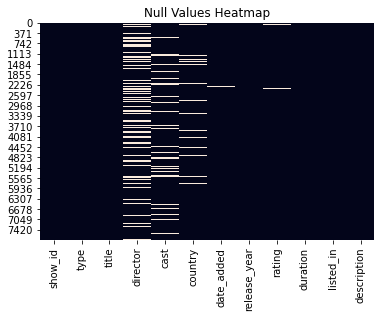

In [21]:
sns.heatmap(netflix_titles_df.isnull(), cbar=False)
plt.title('Null Values Heatmap')
plt.show()

In [22]:
#We see column - director , cast, country, date_added, rating have NAN values

In [23]:
#Replacing NAN values in column - director, cast, country with No Director, No Cast, Country Unavailable respectively
#removing NAN value from column date_added and rating
netflix_titles_df['director'].fillna('No Director', inplace=True)
netflix_titles_df['cast'].fillna('No Cast', inplace=True)
netflix_titles_df['country'].fillna('Country Unavailable', inplace=True)
netflix_titles_df.dropna(subset=['date_added','rating'],inplace=True)

In [24]:
netflix_titles_df.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

In [25]:
#dataframe containing only movies
netflix_movies_df = netflix_titles_df[netflix_titles_df['type']=='Movie'].copy()
netflix_movies_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."


In [26]:
#dataframe containg only TV shows
netflix_shows_df = netflix_titles_df[netflix_titles_df['type']=='TV Show'].copy()
netflix_shows_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
11,s12,TV Show,1983,No Director,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
12,s13,TV Show,1994,Diego Enrique Osorno,No Cast,Mexico,"May 17, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...
16,s17,TV Show,Feb-09,No Director,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",Country Unavailable,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."


In [27]:
# We see duration of movies is in minutes and duration of TV shows is in seasons

In [28]:
import jovian

In [29]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ayushisharma1314/netflix-movies-and-tv-shows-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/ayushisharma1314/netflix-movies-and-tv-shows-data-analysis


'https://jovian.ai/ayushisharma1314/netflix-movies-and-tv-shows-data-analysis'

## Exploratory Analysis and Visualization

**TODO** - write some explanation here.



> Instructions (delete this cell)
> 
> - Compute the mean, sum, range and other interesting statistics for numeric columns
> - Explore distributions of numeric columns using histograms etc.
> - Explore relationship between columns using scatter plots, bar charts etc.
> - Make a note of interesting insights from the exploratory analysis

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [30]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it- 
We use histogram to count number of tv shows and movies given in the dataframe.
We use pie chart to show percentage of tv shows and movies in out dataframe.

In [31]:
netflix_titles_df["type"].value_counts()

Movie      5372
TV Show    2398
Name: type, dtype: int64

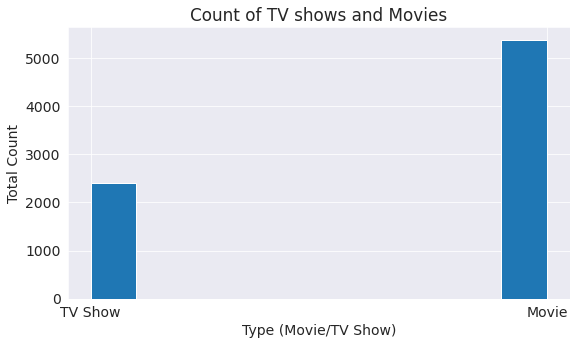

In [32]:
# We show number of movies and TV shows by plotting histogram
plt.hist(netflix_titles_df.type);
plt.title("Count of TV shows and Movies");
plt.xlabel("Type (Movie/TV Show)");
plt.ylabel("Total Count");
plt.show()

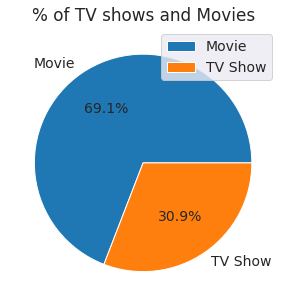

In [33]:
# We show percentage of movies and TV shows by using pie chart
plt.pie(netflix_titles_df.type.value_counts(), labels=netflix_titles_df.type.value_counts().index, autopct='%1.1f%%')
plt.title("% of TV shows and Movies");
plt.legend()
plt.show()

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it- We show what countries have most content in the dataframe

In [34]:
# by using goupby() we group column country
#by count() we count all other values in each column
# by sort() we sort dataframe in descending order

topcontent_countries = netflix_titles_df.groupby('country').count().sort_values('type',ascending=False)
topcontent_countries.reset_index(inplace=True)
topcontent_countries


,country,show_id,type,title,director,cast,date_added,release_year,rating,duration,listed_in,description
0,United States,2546,2546,2546,2546,2546,2546,2546,2546,2546,2546,2546
1,India,923,923,923,923,923,923,923,923,923,923,923
2,Country Unavailable,505,505,505,505,505,505,505,505,505,505,505
3,United Kingdom,396,396,396,396,396,396,396,396,396,396,396
4,Japan,224,224,224,224,224,224,224,224,224,224,224
...,...,...,...,...,...,...,...,...,...,...,...,...
677,"Indonesia, South Korea, Singapore",1,1,1,1,1,1,1,1,1,1,1
678,"Indonesia, United Kingdom",1,1,1,1,1,1,1,1,1,1,1
679,"Indonesia, United States",1,1,1,1,1,1,1,1,1,1,1
680,"Iran, France",1,1,1,1,1,1,1,1,1,1,1


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type', ylabel='country'>

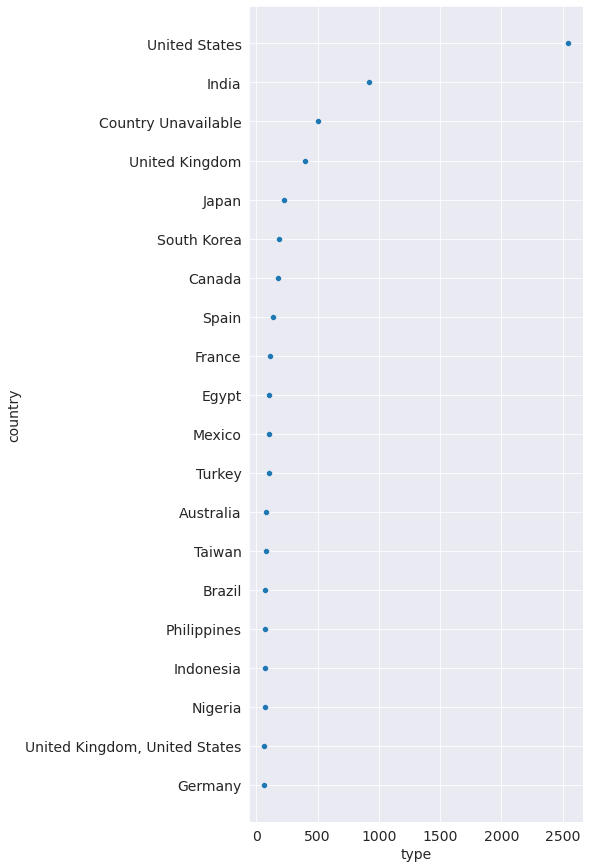

In [35]:
plt.figure(figsize=(6, 15))
sns.scatterplot(topcontent_countries.type,topcontent_countries.country.head(20))

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it- What are most common ratings in the dataset

,rating,Nbr
0,TV-MA,2861
1,TV-14,1928
2,TV-PG,804
3,R,665
4,PG-13,386
5,TV-Y,279
6,TV-Y7,270
7,PG,247
8,TV-G,194
9,NR,83


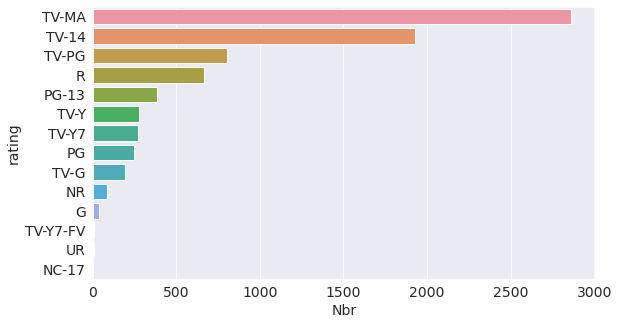

In [36]:
nf_df_rating = netflix_titles_df['rating'].value_counts()
nf_df_rating = pd.DataFrame(nf_df_rating).reset_index()
nf_df_rating.columns = ['rating','Nbr']
sns.barplot(y = 'rating',x = 'Nbr', data=nf_df_rating)
nf_df_rating

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it-What are top genre in the dataframe

In [37]:
# counting each genre
top_listed_in=netflix_titles_df["listed_in"].value_counts()
top_listed_in.head(10)

Documentaries                                       334
Stand-Up Comedy                                     321
Dramas, International Movies                        320
Comedies, Dramas, International Movies              243
Dramas, Independent Movies, International Movies    215
Kids' TV                                            204
Children & Family Movies                            177
Documentaries, International Movies                 172
Children & Family Movies, Comedies                  169
Comedies, International Movies                      161
Name: listed_in, dtype: int64

Text(0.5, 1.0, 'Top 10 Genres of TV Shows')

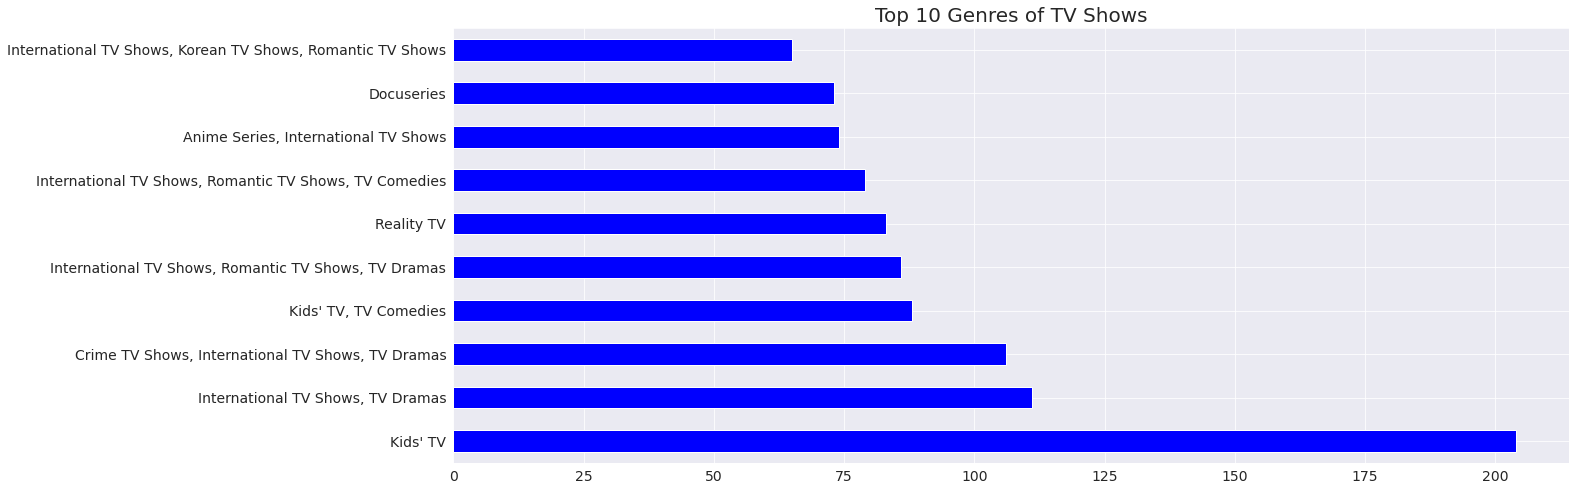

In [38]:
# plotting top 10 genre
plt.figure(figsize=(20,8))
netflix_titles_df[netflix_titles_df["type"]=="TV Show"]["listed_in"].value_counts()[:10].plot(kind="barh",color="blue")
plt.title("Top 10 Genres of TV Shows",size=20)

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it- counting released content of each year and plotting it

In [39]:
netflix_titles_df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...


In [40]:
release_year_df = netflix_titles_df['release_year'].value_counts().sort_index(ascending=False).head(20)
release_year_df.head(20)

2021      31
2020     868
2019     996
2018    1120
2017    1010
2016     881
2015     536
2014     334
2013     265
2012     218
2011     166
2010     171
2009     137
2008     124
2007      85
2006      85
2005      73
2004      59
2003      47
2002      45
Name: release_year, dtype: int64

In [41]:
## Maximum released content was in 2018 with 1120 shows.
## It's 996 in 2019.
## It's 868 in 2020.

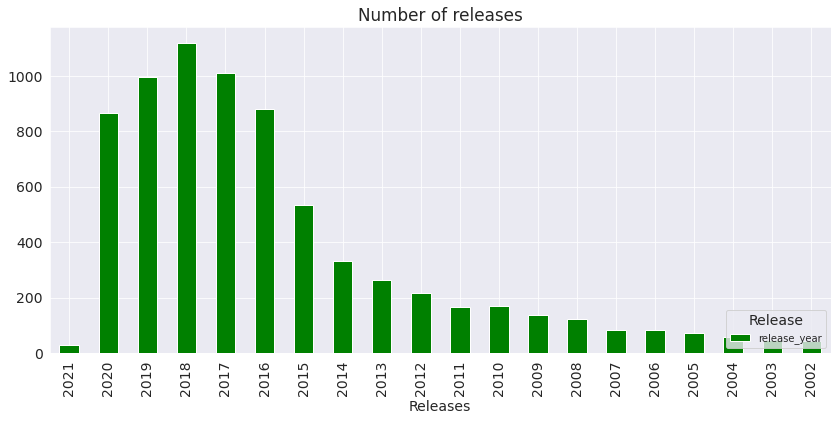

In [42]:
plt.figure(figsize=(14, 6))

release_year_df.plot(kind = 'bar', color = 'g')
plt.xlabel('Releases')
plt.legend(title = "Release",loc="lower right", fontsize = 10)
plt.title("Number of releases")
plt.show()

Let us save and upload our work to Jovian before continuing

In [43]:
import jovian

In [44]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ayushisharma1314/netflix-movies-and-tv-shows-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/ayushisharma1314/netflix-movies-and-tv-shows-data-analysis


'https://jovian.ai/ayushisharma1314/netflix-movies-and-tv-shows-data-analysis'

## Asking and Answering Questions

TODO - write some explanation here.



> Instructions (delete this cell)
>
> - Ask at least 5 interesting questions about your dataset
> - Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
> - Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
> - Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does



#### Q1: TODO - ask a question here and answer it below

In [45]:
release_year_df = netflix_titles_df['release_year'].value_counts().sort_index(ascending=False).head(20)
release_year_df.head(20)

2021      31
2020     868
2019     996
2018    1120
2017    1010
2016     881
2015     536
2014     334
2013     265
2012     218
2011     166
2010     171
2009     137
2008     124
2007      85
2006      85
2005      73
2004      59
2003      47
2002      45
Name: release_year, dtype: int64

In [46]:
## Which Year have most shows released since last 20 years?
## 2018

#### Q2: TODO - ask a question here and answer it below

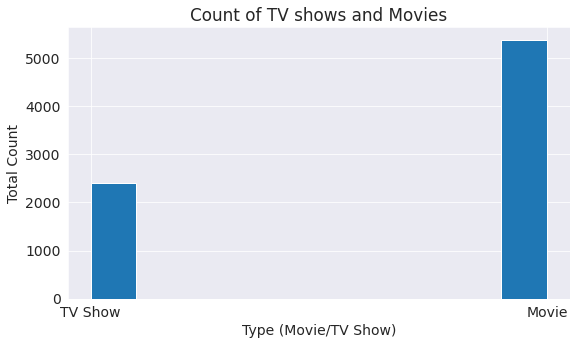

In [47]:
plt.hist(netflix_titles_df.type);
plt.title("Count of TV shows and Movies");
plt.xlabel("Type (Movie/TV Show)");
plt.ylabel("Total Count");
plt.show()

In [48]:
# What type of content is more TV shows or movies?
# Movies

#### Q3: TODO - ask a question here and answer it below

,rating,Nbr
0,TV-MA,2861
1,TV-14,1928
2,TV-PG,804
3,R,665
4,PG-13,386
5,TV-Y,279
6,TV-Y7,270
7,PG,247
8,TV-G,194
9,NR,83


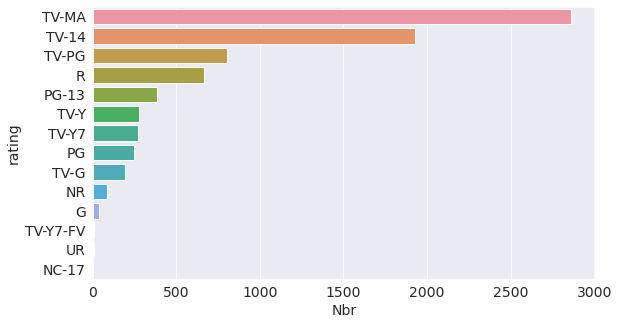

In [49]:
nf_df_rating = netflix_titles_df['rating'].value_counts()
nf_df_rating = pd.DataFrame(nf_df_rating).reset_index()
nf_df_rating.columns = ['rating','Nbr']
sns.barplot(y = 'rating',x = 'Nbr', data=nf_df_rating)
nf_df_rating

In [50]:
# What rating is mostly given to the content in the dataframe?

In [51]:
# TV-MA

#### Q4: TODO - ask a question here and answer it below

In [52]:

topcontent_countries = netflix_titles_df.groupby('country').count().sort_values('type',ascending=False)
topcontent_countries.reset_index(inplace=True)
topcontent_countries

,country,show_id,type,title,director,cast,date_added,release_year,rating,duration,listed_in,description
0,United States,2546,2546,2546,2546,2546,2546,2546,2546,2546,2546,2546
1,India,923,923,923,923,923,923,923,923,923,923,923
2,Country Unavailable,505,505,505,505,505,505,505,505,505,505,505
3,United Kingdom,396,396,396,396,396,396,396,396,396,396,396
4,Japan,224,224,224,224,224,224,224,224,224,224,224
...,...,...,...,...,...,...,...,...,...,...,...,...
677,"Indonesia, South Korea, Singapore",1,1,1,1,1,1,1,1,1,1,1
678,"Indonesia, United Kingdom",1,1,1,1,1,1,1,1,1,1,1
679,"Indonesia, United States",1,1,1,1,1,1,1,1,1,1,1
680,"Iran, France",1,1,1,1,1,1,1,1,1,1,1


In [53]:
# what country has most of the content?

In [54]:
# USA

#### Q5: TODO - ask a question here and answer it below

In [55]:
release_year_df = netflix_titles_df['release_year'].value_counts().sort_index(ascending=False).head(20)
release_year_df.head(20)

2021      31
2020     868
2019     996
2018    1120
2017    1010
2016     881
2015     536
2014     334
2013     265
2012     218
2011     166
2010     171
2009     137
2008     124
2007      85
2006      85
2005      73
2004      59
2003      47
2002      45
Name: release_year, dtype: int64

In [56]:
# which year has least released content?

In [57]:
#2002

Let us save and upload our work to Jovian before continuing.

In [58]:
import jovian

In [59]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ayushisharma1314/netflix-movies-and-tv-shows-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/ayushisharma1314/netflix-movies-and-tv-shows-data-analysis


'https://jovian.ai/ayushisharma1314/netflix-movies-and-tv-shows-data-analysis'

## Inferences and Conclusion

**TODO** - Write some explanation here: a summary of all the inferences drawn from the analysis, and any conclusions you may have drawn by answering various questions.

In [60]:
import jovian

In [61]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ayushisharma1314/netflix-movies-and-tv-shows-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/ayushisharma1314/netflix-movies-and-tv-shows-data-analysis


'https://jovian.ai/ayushisharma1314/netflix-movies-and-tv-shows-data-analysis'

## References and Future Work

**TODO** - Write some explanation here: ideas for future projects using this dataset, and links to resources you found useful.

> Submission Instructions (delete this cell)
> 
> - Upload your notebook to your Jovian.ml profile using `jovian.commit`.
> - **Make a submission here**: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
> - Share your work on the forum: https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684
> - Share your work on social media (Twitter, LinkedIn, Telegram etc.) and tag [@JovianML](https://twitter.com/jovianml)
>
> (Optional) Write a blog post
> 
> - A blog post is a great way to present and showcase your work.  
> - Sign up on [Medium.com](https://medium.com) to write a blog post for your project.
> - Copy over the explanations from your Jupyter notebook into your blog post, and [embed code cells & outputs](https://medium.com/jovianml/share-and-embed-jupyter-notebooks-online-with-jovian-ml-df709a03064e)
> - Check out the Jovian.ml Medium publication for inspiration: https://medium.com/jovianml


 

In [62]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>